## Refrences
1. Linda, T. (2021). What Is Machine Learning and Why Is It Important? [online] SearchEnterpriseAI. Available at: https://www.techtarget.com/searchenterpriseai/definition/machine-learning-ML [Accessed 1 Dec. 2023].
2. Hector Cuesta (2013) Practical Data Analysis. Birmingham, UK: Packt Publishing. Available at: https://search.ebscohost.com/login.aspx?direct=true&db=e250xww&AN=654543&site=eds-live&scope=site (Accessed: 18 October 2023)

# 1 : Introduction 
### 1.1 What is data
Data is plain facts gathered within a defined context. Statistians would refer to it as a set of obsevations, which contain variables or columns of varying/unique characteristics. Data can also be referred to as a piece of information after it has been summarised, and when subjected to analysis, data can be referred to as evidence of a hypothesis. Before data can become information and utilmately evidence it must go through a process. Data analysis is the process in which raw data is ordered and organized, to be used in methods that help to explain the past and predict the future (Hector, 2013). 
Data analysis been a a scientific process, there are no necessarily any methodology to come to a conclusion on every task, however as a general rule, in other to aciheve a quality result in any analysis the data used must be processed before it is used to make predictions using machine learning models. This project is an integrated project of both data preparation and machine learning modelling. 

### 1.2 Data preparation
Data preparation also known as data preprocessing in a crucial step for a reliable data analysis and modelling results. This process involves early data analysis (EDA), data cleaning, transformation, handling imbalanced data, feature engineering, handling imbalanced data, visualisation, and feature selection. DP takes over 80% of data analysis and modelling process because if we put ill-prepared data into our machine learning model, we would get bad results, hence having through DP is imperative to getting a reliable predition from data. 
### 1.2.1 Machine learning
Machine learning (ML) is a branch of artificial intelligence (AI) that focuses on building computer systems that learn from data (Linda, 2021). Machine learning algorithms are trained to find relationships and patterns in data (Linda, 2021). Though diffrent ML algarithms work in diffrent ways, their ultimate goal is to make predictions about the the future of a particular data context by learning the pattern in the present availble data. The qaulity and relaibility of the predictions made is dependent on the quality of the data used to train the ML algarithms. 

### 1.3 undertsanding dataset and source
Dsiclaimer: This is the data summary provided in CA overveiw. 
The NHANES dataset was created to assess the health and nutritional status of adults and children in the
United States. This dataset is funded by the Centers for Disease Control and Prevention (CDC), specifically
through its National Center for Health Statistics (NCHS). The data is based on the survey respondents
throughout the United States. Data was gathered through interviews, physical examinations, and laboratory
tests. For this subset respondents 65 years old and older were labeled as “senior” and all individuals under
65 years old as “non-senior.”

### 1.4 Objectives
1. Set up github account to tract project implementation 
2. Download and load 'NHANES_age_prediction.csv' load Jupyternotebook in pandas datafram form to allow data manupulation
3. Import appropraite laibraries needed for data manipulation
4. Perform indepth early data analysis
5. Perform data cleaning 
6. Apply encoding, scaling and feature engineering as required
7. Employ both LDA (Linear Discriminant Analysis) and PCA (Principal Component Analysis) and compare the separation of classes through visiualization
8. Explain in my own words the diffrence between LDA and PCA in relation to my analyis result.
9. With pattern, apply appropriate Machine learning models to dataset to make furture predictions and justify choices.
10. Train and test the ML models with different splits/ with appropriate metrics for unsupervised learning and cross validate with K-fold cross-validation
11. Compare similarities and contrast in ML modelling outcomes. 

In [1]:
#Importing packages i need for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset

In [2]:
df= pd.read_csv("NHANES_age_prediction.csv")

### loading data 
Pandas(pd) has been used in the first line of code to load the 'NHANES_age_prediction.csv' into a dataframe. A dataframe is a tabular form, column-oriented data structre. It contains both rows and columns (McKenny, 2017). The columns in a data frame have corresponding names called feautures/ variables and the rows are the observation of each feature. Pandas dataframe makes working with the datas in 'NHANES_age_prediction.csv' dataset easy, fast and it also enables the manipulation of this data. 

***Eplaining code:*** 'read_csv' funtion from the pandas library was called and the name of the data file was passed as an argument in parentesis and the resulting dataframe is named df. The read_csv has been used because the project dataset is in csv format, and naming the resulting dataframe enhances manipulationn of dataframe during project implementation.

## Early data analysis

In [3]:
#Displaying the first five rows of df
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [4]:
#Displaying the last five rows of df
df.tail()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
2273,83711.0,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,Adult,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99
2277,83727.0,Adult,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76


In [5]:
# checking size of df
df.shape

(2278, 10)

In [6]:
df.dtypes

SEQN         float64
age_group     object
RIDAGEYR     float64
RIAGENDR     float64
PAQ605       float64
BMXBMI       float64
LBXGLU       float64
DIQ010       float64
LBXGLT       float64
LBXIN        float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


# Note:
## Describe before cleaning and after to compare the difference

In [8]:
df.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [9]:
df.describe(include = 'object')

,age_group
count,2278
unique,2
top,Adult
freq,1914


In [10]:
df.isnull().sum()

SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

In [11]:
#No duplicate values 
df.duplicated().sum() 

0

In [12]:
df['age_group'].unique() 

array(['Adult', 'Senior'], dtype=object)

After loading the csv file into a data frame called df using the read_csv method in pandas library, to give us an insight into df, some methods in the pandas library to peform specific funtions.
### what (.head and .tail) mean
'df.head()' this code was impelemented to display the first few rows of the df dataframe. By defualt, the '.head()' method will display first 5 rows using indexing of the entire features in the dataframe. The 'df.tail()' also by defualt returns the last 5 rows of the entire dataframe.  
### .shape meaning 
'df.shape', this code was implemented to be able to get the number of rows/observations and features in df dataframe. According to result, we have 2278 observations and 10 features in the df dataframe. 
### .info meaning
In other to be able to undetand the datatypes of our individual variable, we need the '.info' method from pandas library. 'df.info' means calling the info method from pandas and passing df as an argument, the output shows us we have 1 object and 9 floats.
### .isnull().sum()
This method from pandas is used to check for missing_values in the dataset and the .sum argument, ask to return only the sum of all the missing_values in each variables. Result shows that there are no missing values in the the df dataframe.
### duplicated().sum()
This method from pandas is used to check for duplicated values in the dataset and the .sum argument, ask to return only the sum of all the duplicates in each variables if any is found. Result shows that there are no duplicated values in the the df dataframe.
### .dtypes meaning
To futher understand the datatypes of the features I have in the df dataframe, I used '.dtypes' method from the pandas library to get the datatype of each specific feature, and as shown above, results suggest that the 'age_group' is the only column in object form, and the remaining 9 columns are floats. 
### Object meaning
***df['age_group'].unique()***
Object may mean that the age_group column have some string values in it's observation, it can also mean that all the observations in 'age_group' column are string values. Therefore in other to check the case is in df dtaframe, i used 'df['age_group'].unique()' code to get the unique values in the 'age_group' variable. Result of theis operation show me the age_group is a categorical data, hence the object datatype. 

### . describe meaning
In order to statistically explore the numerical varibles in df, I used the '.describe()' method from the pandas library. This give a descriptive statistical analysis of df. The importance of this operatation is to see the pattern in which the observations in the numerical variables is distributed on the bell-curve. This method however only by default gives the statistical analysis of numerical data. This is why the result is only for 9 variables and there are 10 variables in total according to insight from data shape. 

In other to explore categorical data in 'age_group' column, I used 'df.describe(include = 'object')' code syntax. This enable us to explore non-numerical data in 'age_group' column by addind an argument 'include=object', result of this operation shouw Adult category have the highest frequency in the 'age_group' column.  

### Results of numerical statistical discription gives
The results the decribe method returns can be broadly categorised under two heading:
1. Measure of central tendency (location): This is the position of distribution idicators on the bell curve. 
2. Variablity: This gives us an insight into how sparsed or thight observations are from or to each other. This is call the variance of the observations
#### Measure of central tendency (location)
1 ***count:*** This is the number of observation in each feauture, result shows we have 2278 obsevations in all 9 numercal.
2 ***means:*** This is the average of all the obsevations in the feuture.
3 ***Std:*** This means standard deviation which is a the variation between the observations in each feature.
4 ***min & max:*** This is the minimum and maximum observations in each feature respectively' 
5. ***50%:*** Is the median and mode of the observation. Median is the middle number or the average of the middle numbers after the observations have been sorted.  
#### Variability
In addition to knowing locations of our observations, it is important to explore the variablility of the observations from the mean. The 6&7 gives us an insight into this: 

6. ***Variance:**** Variance as the name implies, is the measure of dispersion of data from the mean (Torres-Reyna, 2008). This is calculated by squaring the diffrence between mean and each observation in a column i.e (each column observation minus mean of the column), and dividing the summation of squares by the to total number of observation minus 1 i.e (1000-1) for 'churn' (Hayes, 2023). This 
7. ***Stardard deviation:*** Standard deviation is the square root of variance. Variables with high stardard deviation relative to the mean have their datas spread out from the mean, while those with small standard deviation have their datas tightly grouped close to the mean.

### Effect of this on analysis? 
Understanding what the results means in ration to df is of enssence in other to proceimportant 


In [22]:
df.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


## Understanding variable feature
To enhance understanding and explaning the statistical discription of each variable i need to understand what they are. To do this i will explore the unique values i this variables to check if i can deduce anything from it.

## Visualising Numerical data

The describe method was used to statiscally expalian the numerical variables. However to be able to visualise the trend 

In [13]:
df['RIDAGEYR'].unique()

array([61., 26., 16., 32., 38., 50., 14., 57., 75., 43., 54., 36., 80.,
       71., 67., 70., 25., 24., 30., 44., 12., 58., 77., 29., 53., 46.,
       48., 56., 15., 31., 13., 35., 21., 39., 62., 59., 63., 34., 72.,
       64., 65., 47., 66., 51., 27., 37., 41., 42., 49., 20., 40., 22.,
       17., 60., 28., 79., 52., 23., 19., 18., 68., 33., 45., 74., 78.,
       55., 73., 69., 76.])

In [14]:
df['RIAGENDR'].unique()

array([2., 1.])

In [15]:
df['PAQ605'].unique()

array([2., 1., 7.])

In [16]:
df['BMXBMI'].unique()

array([35.7, 20.3, 23.2, 28.9, 35.9, 23.6, 38.7, 38.3, 38.9, 32.7, 27.3,
       24.6, 30.5, 30.3, 22.1, 37.8, 28. , 46.1, 21. , 33. , 29.1, 32.3,
       37.6, 36.4, 18. , 33.6, 21.4, 18.9, 26.4, 26.5, 19.2, 36.2, 22.5,
       27.5, 25.6, 37.5, 39.7, 21.1, 19. , 23.4, 20.6, 18.1, 30.2, 24.9,
       23. , 49.9, 32.2, 27.8, 26.3, 25. , 28.6, 19.7, 22.6, 41.1, 19.5,
       50.9, 28.1, 30.7, 30.8, 42.1, 21.5, 26.6, 22.2, 29.4, 32.4, 30.9,
       32. , 29.7, 24.2, 22.4, 26.8, 39.2, 31.9, 31.2, 25.4, 24.5, 18.4,
       23.5, 26.2, 39. , 35. , 35.6, 42.7, 23.7, 23.9, 29.9, 47.2, 34.2,
       40.7, 24.3, 37. , 28.7, 36.1, 26.9, 14.5, 29.5, 21.3, 21.9, 49.2,
       30.6, 33.3, 31.6, 19.8, 31.8, 16.8, 28.2, 45.1, 31. , 27.6, 30.4,
       39.8, 47.7, 22.7, 29.6, 33.9, 21.8, 24.4, 34.7, 37.1, 20.9, 44.9,
       26.1, 28.3, 47.8, 27.9, 31.4, 43.1, 33.2, 28.5, 21.7, 38.5, 48.6,
       25.8, 27.2, 29. , 15.9, 43.2, 36.8, 25.1, 25.2, 24. , 51.3, 30. ,
       34. , 43.3, 32.6, 21.6, 18.6, 44.1, 32.5, 44

In [17]:
df['LBXGLU'].unique()

array([110.,  89., 104., 103.,  94., 107.,  90.,  98.,  85., 100., 102.,
       133., 114.,  96., 139.,  86., 108.,  99., 105.,  87.,  95.,  88.,
       111.,  93.,  83.,  69., 112., 129.,  79., 119., 120.,  92., 118.,
       115., 101.,  81., 106., 142., 125., 109.,  91.,  97.,  84.,  82.,
        73.,  80., 123.,  72., 159., 117., 124., 297., 208., 122., 127.,
       116.,  74., 113.,  75., 135.,  77., 175., 156., 138., 131., 121.,
       250., 134., 128.,  78., 126., 137., 166., 257., 140., 136., 275.,
       150., 210., 130., 223., 195., 147., 405., 183.,  70.,  63.,  68.,
        66., 149., 179., 368., 188., 220.,  76.,  67., 155., 160., 132.,
       158., 333.])

In [18]:
df['DIQ010'].unique()

array([2., 1., 3.])

In [19]:
df['LBXGLT'].unique()

array([150.,  80.,  68.,  84.,  81., 100., 202., 164., 113.,  95.,  91.,
        97., 124., 295., 120.,  82., 154.,  77., 160.,  72.,  76.,  83.,
       158.,  78.,  67., 142., 145., 184.,  79., 171.,  93., 106., 122.,
       170.,  86., 185.,  74.,  85.,  98.,  96., 138., 121.,  88., 109.,
       155., 203., 136.,  55., 134., 159., 192., 108.,  90., 103., 117.,
       137., 123.,  89., 215., 143., 101., 147., 110.,  92., 178.,  64.,
       119., 201., 152.,  71., 176.,  94., 193., 131.,  65., 104.,  62.,
       130., 151., 249.,  44., 107.,  99., 141., 175., 320., 139., 132.,
        87., 126., 148., 102.,  63.,  69.,  51., 112.,  58., 225., 116.,
       161., 473., 129., 315., 140., 105., 111.,  75., 135., 173., 252.,
       114., 169., 128.,  73.,  66., 163., 115.,  60., 219., 149., 181.,
        41.,  47., 118., 162., 125., 127., 209.,  70.,  46., 179., 236.,
       190., 146., 188., 182., 177., 199., 157., 180., 316., 311.,  57.,
       233., 207., 168., 156.,  52., 226., 205., 20

In [20]:
df['LBXIN'].unique()

array([14.91,  3.85,  6.14, ..., 13.91, 21.41,  3.76])

In [21]:
df['SEQN'].unique()

array([73564., 73568., 73576., ..., 83713., 83718., 83727.])

Though the 'isnulll()' says there are no nullvalues, i want to explore each varible to see the unique observations in them perhapes the NAN have been represented with unusual values? Aditionally as stated earlier to understand the statistical discription i need to know what each varible mean. For examlple, the satistical discription of an ID variable is not relevant to my analysis, even though it is numerical data.  This is why i used the unique function on all numerical variables. 

I couldn't make so meaning from the numbers. 

### Plan going forward
Explore the real data link provided in the data breife.


## Understanding variable feature

Fig 1 is a data dictionary provided by data aurthor. The variables have been renamed in the data, however finding the data dictionary helped me to define each variable and what their corresponding observations are.
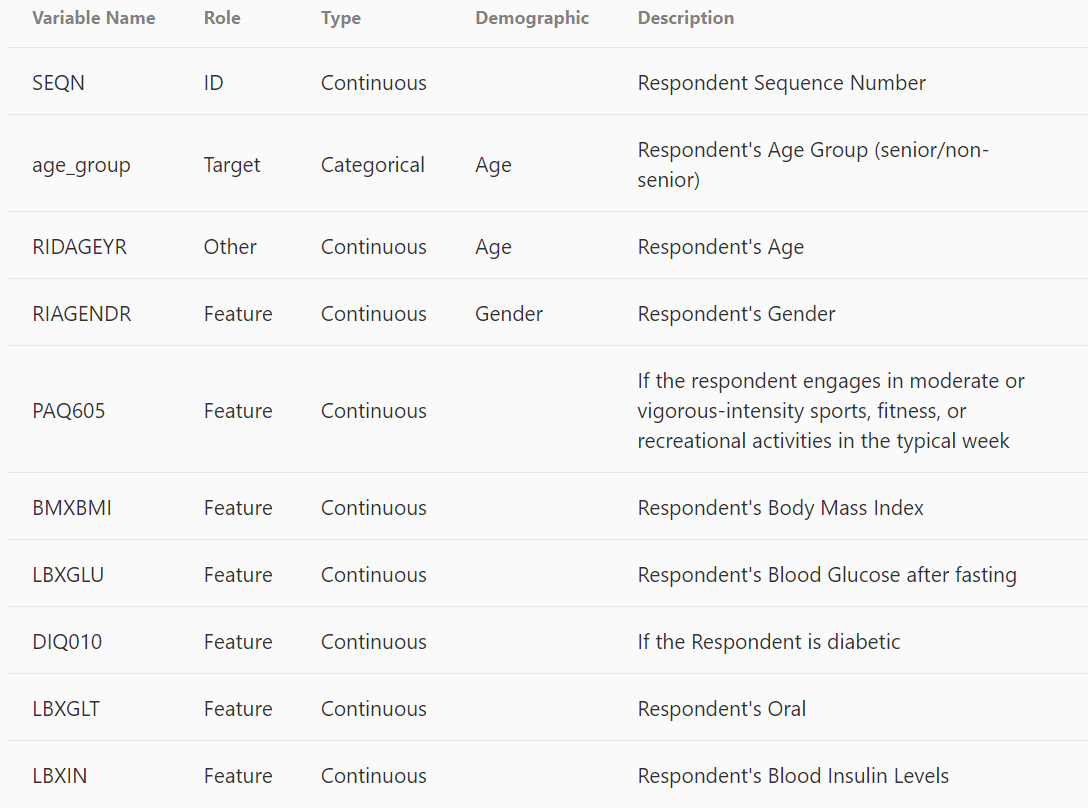

Fig.1 Variable dictionary (NA,NA. 2023).

## Plan forward
As ealier stated, to enhance data manipution i am going to rename each variable and re-define them for my understanding when checking the relationship of between the variables. For Example 'LBXGLT' has no obvious meaning to me, hence i can't understand its effect if any on 'SEQN'



## Rnaming variable
1.